In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

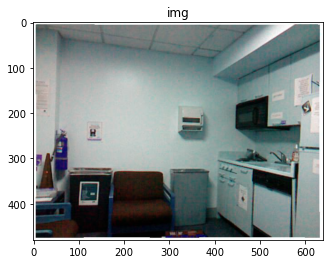

In [2]:
current = 0
max_n = 653

str_current = str(current)
str_current_pad = str_current.zfill(4)
# print (str_current_pad)

img0 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_00000.jpg')
# img1 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_00001.jpg')
# img2 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_00002.jpg')
# img3 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_00003.jpg')
img4 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_00004.jpg')

plt.imshow(img0)
plt.title('img')
plt.show()

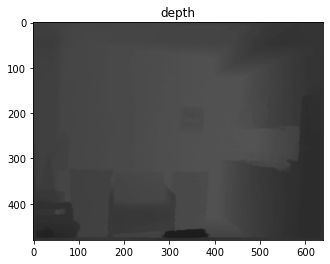

In [3]:
dp0 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/depth/depth_00000.png')
dp4 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/depth/depth_00004.png')

dp0_gray = cv2.cvtColor(dp0, cv2.COLOR_BGR2GRAY)
dp4_gray = cv2.cvtColor(dp4, cv2.COLOR_BGR2GRAY)

plt.imshow(dp0_gray, cmap='gray', vmin = 0, vmax = 255)
plt.title('depth')
plt.show()

1
40.376038
65.659164


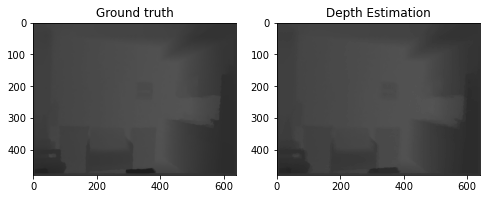

0.7188346354166666
0.030099644107674184
0.008462977409362794
2
40.376038
65.659164


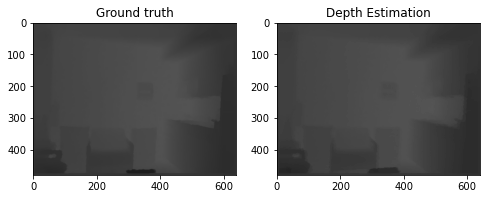

0.6832389322916667
0.03014533197725801
0.009548867543538411
3
82.776115
23.27452


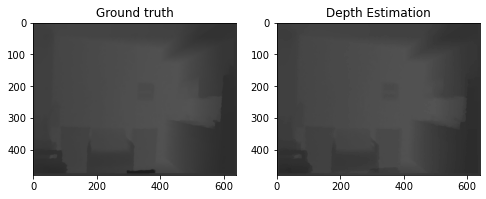

0.6726595052083333
0.03299968216730974
0.010802132288614909
Wall time: 887 ms


In [4]:
%%time
# Parameters for Shi-Tomasi corner detection
feature_params = dict(maxCorners = 300, qualityLevel = 0.2, minDistance = 2, blockSize = 7)
# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize = (15,15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

start_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
end_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

for i in range(3):
    index = i+1
    print (index)
    img = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_0000'+str(index)+'.jpg')
    
    start = cv2.goodFeaturesToTrack(start_gray, mask = None, **feature_params)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_current, status, error = cv2.calcOpticalFlowPyrLK(start_gray, img_gray, start, None, **lk_params)

    flow_start = np.sum(np.abs(start[status == 1]-img_current[status == 1]))
    print (flow_start)
    
    img_current = cv2.goodFeaturesToTrack(img_gray, mask = None, **feature_params)
    img_end, status, error = cv2.calcOpticalFlowPyrLK(img_gray, end_gray, img_current, None, **lk_params)
    flow_end = np.sum(np.abs(img_current[status == 1]-img_end[status == 1]))
    print (flow_end)
    
    # depth ground truth
    dp_gt = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/depth/depth_0000'+str(index)+'.png')
    dp_gt_gray = cv2.cvtColor(dp_gt, cv2.COLOR_BGR2GRAY)

    f_start = flow_end / (flow_start+flow_end)
    f_end = flow_start / (flow_start+flow_end)
    
    dp_current_est = np.rint(f_start * dp0_gray + f_end * dp4_gray)

    
    fig = plt.figure(figsize=(8,3))

    plt.subplot(1, 2, 1)
    plt.imshow(dp_gt, cmap='gray', vmin = 0, vmax = 255)
    plt.title('Ground truth')
    
    plt.subplot(1, 2, 2)
    plt.imshow(dp_current_est, cmap='gray', vmin = 0, vmax = 255)
    plt.title('Depth Estimation')
    plt.show()
    
    fig.savefig('est vs gt.png')

    
    dp_error = dp_gt_gray - dp_current_est
    dp_error_count = np.count_nonzero(dp_error)
    # exact match
    print (1 - dp_error_count/(dp_gt_gray.shape[0]*dp_gt_gray.shape[1]))
    # error for the non-exact match
    print (np.sum(np.abs(dp_error)/dp_gt_gray)/dp_error_count)
    
    print (np.sum(np.abs(dp_error)/dp_gt_gray)/(dp_gt_gray.shape[0]*dp_gt_gray.shape[1]))

In [5]:
%%time

# test all 654 cases 

rst_dp_mismatch = np.zeros((654, 3)) 
rst_dp_error_rate = np.zeros((654, 3)) 
rst_dp_error_rate_overall = np.zeros((654, 3)) 

for test_case in range(654):
    str_current = str(test_case)
    str_current_pad = str_current.zfill(4)
    # print (str_current_pad)

    img0 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_00000.jpg')
    img4 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_00004.jpg')
    dp0 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/depth/depth_00000.png')
    dp4 = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/depth/depth_00004.png')

    dp0_gray = cv2.cvtColor(dp0, cv2.COLOR_BGR2GRAY)
    dp4_gray = cv2.cvtColor(dp4, cv2.COLOR_BGR2GRAY)
    
    feature_params = dict(maxCorners = 300, qualityLevel = 0.2, minDistance = 2, blockSize = 7)
    lk_params = dict(winSize = (15,15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    start_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    end_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

    for i in range(3):
        index = i+1
        img = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/rgb/rgb_0000'+str(index)+'.jpg')

        start = cv2.goodFeaturesToTrack(start_gray, mask = None, **feature_params)

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_current, status, error = cv2.calcOpticalFlowPyrLK(start_gray, img_gray, start, None, **lk_params)

        flow_start = np.sum(np.abs(start[status == 1]-img_current[status == 1]))

        img_current = cv2.goodFeaturesToTrack(img_gray, mask = None, **feature_params)
        img_end, status, error = cv2.calcOpticalFlowPyrLK(img_gray, end_gray, img_current, None, **lk_params)
        flow_end = np.sum(np.abs(img_current[status == 1]-img_end[status == 1]))

        # depth ground truth
        dp_gt = cv2.imread('test_fps30_fl5_end/'+str_current_pad+'/depth/depth_0000'+str(index)+'.png')
        dp_gt_gray = cv2.cvtColor(dp_gt, cv2.COLOR_BGR2GRAY)

        f_start = flow_end / (flow_start+flow_end)
        f_end = flow_start / (flow_start+flow_end)

        dp_current_est = np.rint(f_start * dp0_gray + f_end * dp4_gray)

        # error evaluation
        dp_error = dp_gt_gray - dp_current_est
        dp_error_count = np.count_nonzero(dp_error)
        # exact match
        rst_dp_mismatch[test_case][i] = 1 - dp_error_count/(dp_gt_gray.shape[0]*dp_gt_gray.shape[1])
        # error for the non-exact match
        rst_dp_error_rate[test_case][i] = np.sum(np.abs(dp_error)/dp_gt_gray)/dp_error_count
        # overall error
        rst_dp_error_rate_overall[test_case][i] = np.sum(np.abs(dp_error)/dp_gt_gray)/(dp_gt_gray.shape[0]*dp_gt_gray.shape[1])

Wall time: 1min 30s


In [6]:
print (np.average(rst_dp_mismatch))
print (np.average(rst_dp_error_rate))
print (np.average(rst_dp_error_rate_overall))

0.5936969842369605
0.03985578548397099
0.017411524092729832


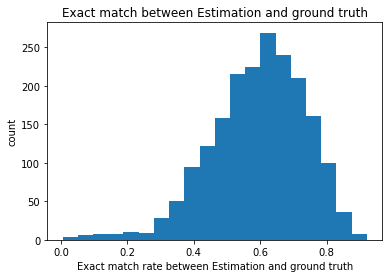

In [7]:
fig = plt.figure()
plt.hist(rst_dp_mismatch.flatten() , 20)
plt.title('Exact match between Estimation and ground truth')
plt.xlabel('Exact match rate between Estimation and ground truth') 
plt.ylabel('count') 
plt.show()

fig.savefig('Exact match between Estimation and ground truth.png')


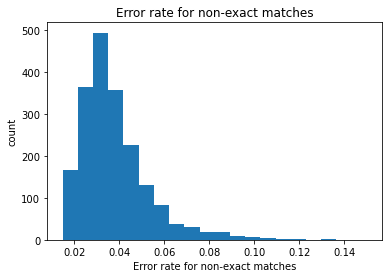

In [8]:
fig = plt.figure()

plt.hist(rst_dp_error_rate.flatten() , 20,  range=(rst_dp_error_rate.min(),0.15))
plt.title('Error rate for non-exact matches')
plt.xlabel('Error rate for non-exact matches') 
plt.ylabel('count') 
plt.show()

fig.savefig('Error rate for non-exact matches.png')


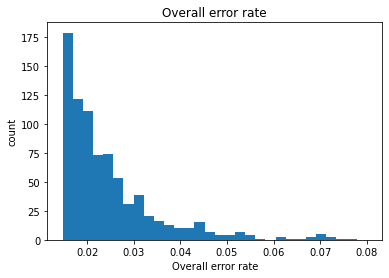

In [9]:
fig = plt.figure()

plt.hist(rst_dp_error_rate_overall.flatten() , 30,  range=(rst_dp_error_rate.min(),0.08))
plt.title('Overall error rate')
plt.xlabel('Overall error rate') 
plt.ylabel('count')
plt.show()

fig.savefig('Overall error rate.png')


In [10]:
%%time
def test_video(flow_engery_threshold):

    feature_params = dict(maxCorners = 300, qualityLevel = 0.2, minDistance = 2, blockSize = 7)
    lk_params = dict(winSize = (15,15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


    vid_in = cv2.VideoCapture("color.mp4")
    vid_dp = cv2.VideoCapture("GT.mp4")


    index = 1
    flows = np.zeros((200,4)) - 2
    vid_in_img = np.zeros((200, 288, 384, 3))
    vid_in_dp = np.zeros((200, 288, 384))


    val, frame_in = vid_in.read()

    val, frame_dp = vid_dp.read()

    last = frame_in
    last_gray = cv2.cvtColor(last, cv2.COLOR_BGR2GRAY)
    last_dp_gray = cv2.cvtColor(frame_dp, cv2.COLOR_BGR2GRAY)


    vid_in_img[0] = frame_in
    vid_in_dp[0] = last_dp_gray

    start = cv2.goodFeaturesToTrack(last_gray, mask = None, **feature_params)


    flows[0,0] = 0
    last_index = 0

    while(vid_in.isOpened()):
        val, frame_in = vid_in.read()
        val, frame_dp = vid_dp.read()

        if not val:
            break

        inpt_gray = cv2.cvtColor(frame_in, cv2.COLOR_BGR2GRAY)
        dp_gray = cv2.cvtColor(frame_dp, cv2.COLOR_BGR2GRAY)

        vid_in_img[index] = frame_in
        vid_in_dp[index] = dp_gray

        current, status, error = cv2.calcOpticalFlowPyrLK(last_gray, inpt_gray, start, None, **lk_params)

        flow_start = np.sum(np.abs(start[status == 1]-current[status == 1]))

        if flow_start > flow_engery_threshold:
            last_gray = inpt_gray
            start = cv2.goodFeaturesToTrack(last_gray, mask = None, **feature_params)     
            flows[index,0] = index
            flows[index,1] = -1
            flows[index,2] = flow_start
            last_index = index
        else:
            flows[index,0] = index
            flows[index,1] = last_index
            flows[index,2] = flow_start

        index+=1

    vid_in.release()
    vid_dp.release()

    last_index = index
    while(index>=0):
        if flows[index,1] < 0:
            if last_index == index:
                flows[index,3] = -1
            else:
                flows[index,3] = 0
            last_index = index - 1
        else:
            flows[index,3] = last_index
        index-=1



    rst_dp_mismatch = np.zeros(157) 
    rst_dp_error_rate = np.zeros(157) 
    rst_dp_error_rate_overall = np.zeros(157) 
    vid_in_img = vid_in_img.astype(int)

    for i in range(156):
        index = i+1
        i2, start_i, flow_start, end_i = flows[index]

        if not i2 == index:
            print("error index mismatch")
            break

        if end_i > 0 and not i2 == end_i:
            end_in = np.uint8(vid_in_img[int(end_i)])
            img_in = np.uint8(vid_in_img[index])

            end_gray = cv2.cvtColor(end_in, cv2.COLOR_BGR2GRAY)
            img_gray = cv2.cvtColor(img_in, cv2.COLOR_BGR2GRAY)

            img_current = cv2.goodFeaturesToTrack(img_gray, mask = None, **feature_params)

            img_end, status, error = cv2.calcOpticalFlowPyrLK(img_gray, end_gray, img_current, None, **lk_params)

            flow_end = np.sum(np.abs(img_current[status == 1]-img_end[status == 1]))

            # depth ground truth
            dp_gt_gray = vid_in_dp[index]

            f_start = flow_end / (flow_start+flow_end)
            f_end = flow_start / (flow_start+flow_end)

            dp_current_est = np.rint(f_start * vid_in_dp[int(start_i)] + f_end * vid_in_dp[int(end_i)])

            # error evaluation
            dp_error = dp_gt_gray - dp_current_est
            dp_error_count = np.count_nonzero(dp_error)
            # exact match
            rst_dp_mismatch[index] = 1 - dp_error_count/(dp_gt_gray.shape[0]*dp_gt_gray.shape[1])
            # error for the non-exact match
            
            error = np.abs(dp_error)/dp_gt_gray
            error[error >= float('+inf')] = 0
            error = np.nan_to_num(error)
            
            rst_dp_error_rate[index] = np.sum(error)/dp_error_count
            # overall error
            rst_dp_error_rate_overall[index] = np.sum(error)/(dp_gt_gray.size)

    return ((np.max(flows[:,0])
               - 2*(np.max(flows[:,0]) - np.count_nonzero(flows[0:157,3])) 
               - (np.max(flows[:,0]) - np.count_nonzero(flows[0:157,3]+1))
               -2)/(np.max(flows[:,0])+1),
            rst_dp_mismatch,
            rst_dp_error_rate,
            rst_dp_error_rate_overall)

        
skipped, rst_dp_mismatch, rst_dp_error_rate, rst_dp_error_rate_overall = test_video(flow_engery_threshold = 400)


Wall time: 1.2 s


In [11]:
print (np.sum(rst_dp_mismatch)/np.count_nonzero(rst_dp_mismatch))
print (np.sum(rst_dp_error_rate)/np.count_nonzero(rst_dp_error_rate))
print (np.sum(rst_dp_error_rate_overall)/np.count_nonzero(rst_dp_error_rate_overall))


0.60734691609635
0.03213393574349914
0.0128791064233526


In [12]:
%%time
rst = np.zeros((200,4))

for i in range(200):
    test_flow_engery_threshold = (i+5)*5
    skipped, rst_dp_mismatch, rst_dp_error_rate, rst_dp_error_rate_overall = test_video(flow_engery_threshold = test_flow_engery_threshold)
    rst[i][0] = skipped
    if not np.count_nonzero(rst_dp_mismatch) == 0:
        rst[i][1] = np.sum(rst_dp_mismatch)/np.count_nonzero(rst_dp_mismatch)
    if not np.count_nonzero(rst_dp_error_rate) == 0:
        rst[i][2] = np.sum(rst_dp_error_rate)/np.count_nonzero(rst_dp_error_rate)
    if not np.count_nonzero(rst_dp_error_rate_overall) == 0:
        rst[i][3] = np.sum(rst_dp_error_rate_overall)/np.count_nonzero(rst_dp_error_rate_overall)

<timed exec>:124: RuntimeWarning: divide by zero encountered in true_divide
<timed exec>:124: RuntimeWarning: invalid value encountered in true_divide


Wall time: 4min 13s


In [13]:
a = rst[:,0]
b = rst[:,1]
c = rst[:,2]
d = rst[:,3]

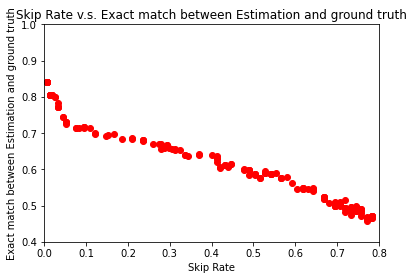

In [14]:
fig = plt.figure()

plt.plot(a, b, 'ro')
plt.axis([0, 0.8, 0.4, 1])
plt.title('Skip Rate v.s. Exact match between Estimation and ground truth')
plt.xlabel('Skip Rate') 
plt.ylabel('Exact match between Estimation and ground truth') 
plt.show()

fig.savefig('Skip Rate v.s. Exact match between Estimation and ground truth.png')


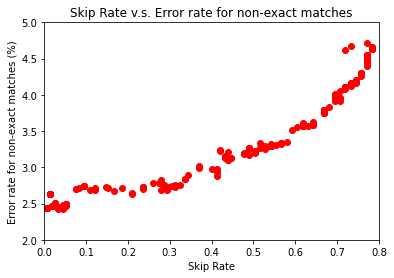

In [15]:
fig = plt.figure()

plt.plot(a, c*100, 'ro')
plt.axis([0, 0.8, 2, 5])
plt.title('Skip Rate v.s. Error rate for non-exact matches')
plt.xlabel('Skip Rate') 
plt.ylabel('Error rate for non-exact matches (%)') 
plt.show()

fig.savefig('Skip Rate v.s. Error rate for non-exact matches.png')


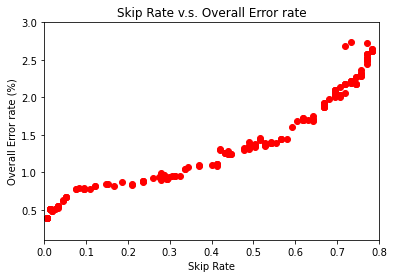

In [16]:
fig = plt.figure()

plt.plot(a, d*100, 'ro')
plt.axis([0, 0.8, 0.1, 3])
plt.title('Skip Rate v.s. Overall Error rate')
plt.xlabel('Skip Rate') 
plt.ylabel('Overall Error rate (%)')
plt.show()

fig.savefig('Skip Rate v.s. Overall Error rate.png')
